In [20]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

In [10]:
# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name"])
school_data = school_data_complete.to_csv('Resources/school_data.csv')

In [11]:
#District Summary

#Calculate the total number of schools
school_names = school_data_complete.groupby('school_name')
schools = school_names['school_name'].sum()
total_schools = schools.count()

#Calculate the total number of students
total_students = school_data_complete['student_name'].count()

#Calculate the total budget
school_budgets = school_data_complete.groupby('budget').sum
school_budgets = pd.DataFrame(school_budgets(columns = 'budget'))
school_budgets = school_budgets.reset_index()
total_budgets = school_budgets['budget'].sum()


#Calculate the average math score
avg_math_score = school_data_complete['math_score'].mean()


#Calculate the average reading score
avg_reading_score = school_data_complete['reading_score'].mean()


#Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2
passing_rates = (avg_math_score + avg_reading_score) / 2


#Calculate the percentage of students with a passing math score (70 or greater)
passing_math_scores = school_data_complete.loc[school_data_complete['math_score'] >= 70,:]
passing_math_students = passing_math_scores['math_score'].count()
percent_passing_math = (passing_math_students / total_students) * 100


#Calculate the percentage of students with a passing reading score (70 or greater)
passing_reading_scores = school_data_complete.loc[school_data_complete['reading_score'] >= 70,:]
passing_reading_students = passing_reading_scores['reading_score'].count()
percent_passing_reading = (passing_reading_students / total_students) * 100


#Create a dataframe to hold the above results
school_results = {'Total Schools':total_schools, 'Total Students':total_students, 'Total Budgets':total_budgets,
                  'Avg. Math Score':avg_math_score, 'Avg. Reading Score':avg_reading_score, 
                  '% Passing Math':percent_passing_math, '% Passing Reading':percent_passing_reading,
                 '% Passing Rate':passing_rates,}
school_results_df = pd.DataFrame(school_results, index = [0])
school_results_df.head()

,Total Schools,Total Students,Total Budgets,Avg. Math Score,Avg. Reading Score,% Passing Math,% Passing Reading,% Passing Rate
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,80.431606


In [118]:
#School Summary

#Create an overview table that summarizes key metrics about each school, including:

    #School Name
    #School Type
    #Total Students
    #Total School Budget
    #Per Student Budget
    #Average Math Score
    #Average Reading Score
    #% Passing Math
    #% Passing Reading
    #Overall Passing Rate (Average of the above two)

school_data_copy = school_data_complete.copy()
school_data_html = school_data_copy.to_html('assets/school_data.html')

school_summary = school_data_copy.groupby('school_name').first()


school_summary['Total_Students'] = school_data_copy.groupby('school_name')['Student ID'].count()
school_summary['Per Student Budget'] = school_summary.budget / school_summary.Total_Students
school_summary['Avg_Math_Score'] = school_data_copy.groupby('school_name')['math_score'].mean()
school_summary['Avg_Reading_Score'] = school_data_copy.groupby('school_name')['reading_score'].mean()
school_summary['Passing_Math'] = (school_data_copy.loc[school_data_copy['math_score'] >= 70].groupby('school_name')['Student ID'].count() / school_summary.Total_Students) * 100
school_summary['Passing_Reading'] = (school_data_copy.loc[school_data_copy['reading_score'] >= 70].groupby('school_name')['Student ID'].count() / school_summary.Total_Students) * 100
school_summary['Overall_Passing'] = (school_summary.Passing_Math + school_summary.Passing_Reading) / 2

#Create a dataframe to hold the above results
school_summary_results = school_summary.drop(columns = ['Student ID', 'student_name', 'gender', 'grade', 'reading_score', 'math_score', 'School ID', 'size'])

school_summary_results = school_summary_results.rename(columns = {'type':'School Type', 'budget':'Total School Budget', 'Total_Students':'Total Students',
                                        'Avg_Math_Score':'Average Math Schore', 'Avg_Reading_Score':'Average Reading Score',
                                        'Passing_Math':'% Passing Math', 'Passing_Reading':'% Passing Reading',
                                        'Overall_Passing':'% Overall Passing Rate'})


#school_summary_results['Total School Budget'] = school_summary_results['Total School Budget'].map('${:,.2f}'.format)
#school_summary_results['Per Student Budget'] = school_summary_results['Per Student Budget'].map('${:,.2f}'.format)
#school_summary_results = school_summary_results[['School Type', 'Total Students', 'Total School Budget',
#                                                 'Per Student Budget', 'Average Math Schore', 'Average Reading Score',
#                                                '% Passing Math', '% Passing Reading', '% Overall Passing Rate']]

del school_summary_results.index.name

school_summary_results.to_csv('Resources/school_summary.csv')
school_summary_results



,School Type,Total School Budget,Total Students,Per Student Budget,Average Math Schore,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Bailey High School,District,3124928,4976,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1081356,1858,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Figueroa High School,District,1884411,2949,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Ford High School,District,1763916,2739,644.0,77.102592,80.746258,68.309602,79.299014,73.804308
Griffin High School,Charter,917500,1468,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Hernandez High School,District,3022020,4635,652.0,77.289752,80.934412,66.752967,80.862999,73.807983
Holden High School,Charter,248087,427,581.0,83.803279,83.814988,92.505855,96.252927,94.379391
Huang High School,District,1910635,2917,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,3094650,4761,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Pena High School,Charter,585858,962,609.0,83.839917,84.044699,94.594595,95.945946,95.270270


<function matplotlib.pyplot.show>

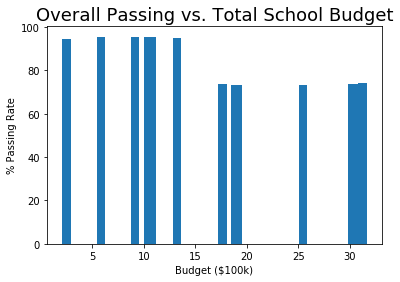

In [111]:
x = school_summary_results['Total School Budget']/100000
y = school_summary_results['% Overall Passing Rate']

plt.bar(x,y)

plt.title('Overall Passing vs. Total School Budget', fontsize = 18)
plt.xlabel('Budget ($100k)')
plt.ylabel('% Passing Rate')

plt.savefig('assets/School_Budget_Passing')
plt.show



In [95]:
charter_schools = school_summary_results.loc[school_summary_results['School Type'] == 'Charter']
charter_schools.to_csv('Resources/charter_schools.csv')

In [96]:
district_schools = school_summary_results.loc[school_summary_results['School Type'] == 'District']
district_schools.to_csv('Resources/district_schools.csv')

<function matplotlib.pyplot.show>

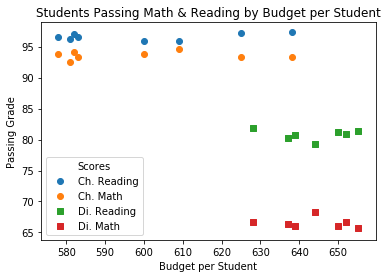

In [122]:
#Create scatter plot of overall passing score versus budget per student by school type


charter_rx = charter_schools['Per Student Budget']
charter_ry = charter_schools['% Passing Reading']
scatter = plt.scatter(charter_rx,charter_ry, marker = 'o', label = 'Ch. Reading')

charter_mx = charter_schools['Per Student Budget']
charter_my = charter_schools['% Passing Math']
scatter = plt.scatter(charter_mx,charter_my, marker = 'o', label = 'Ch. Math')
 
district_rx = district_schools['Per Student Budget']
district_ry = district_schools['% Passing Reading']
scatter = plt.scatter(district_rx,district_ry, marker = 's', label = 'Di. Reading')

district_mx = district_schools['Per Student Budget']
district_my = district_schools['% Passing Math']
scatter = plt.scatter(district_mx,district_my, marker = 's', label = 'Di. Math')


plt.title('Students Passing Math & Reading by Budget per Student')
plt.legend(loc = 'lower left', title = 'Scores')
plt.xlabel("Budget per Student")
plt.ylabel('Passing Grade')

plt.savefig('assets/Student_Budget_Passing')
plt.show



In [64]:
#Top Performing Schools (By Passing Rate)

top_schools = school_summary_results.sort_values(by = '% Overall Passing Rate', ascending = False)
top_schools[:5]



,School Type,Total School Budget,Total Students,Per Student Budget,Average Math Schore,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Cabrera High School,Charter,1081356,1858,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1043130,1635,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,585858,962,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,917500,1468,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,1319574,2283,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [14]:
#Bottom Performing Schools (By Passing Rate)

bottom_schools = school_summary_results.sort_values(by = '% Overall Passing Rate', ascending = True)
bottom_schools[:5]

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Schore,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,73.804308


In [37]:
#Math Scores by Grade

#Create a table that lists the average Math Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

#Create a pandas series for each grade. Hint: use a conditional statement.
mgrades_9th = school_data_copy.loc[school_data_copy["grade"] == '9th']
school_mgrades_9th = mgrades_9th.set_index(['school_name'],['grade'])
school_mgrades_9th_grouped = school_mgrades_9th.groupby(['school_name']).mean()['math_score']
school_mgrades_9th_grouped

mgrades_10th = school_data_copy.loc[school_data_copy["grade"] == '10th']
school_mgrades_10th = mgrades_10th.set_index(['school_name'],['grade'])
school_mgrades_10th_grouped = school_mgrades_10th.groupby(['school_name']).mean()['math_score']
school_mgrades_10th_grouped

mgrades_11th = school_data_copy.loc[school_data_copy["grade"] == '11th']
school_mgrades_11th = mgrades_11th.set_index(['school_name'],['grade'])
school_mgrades_11th_grouped = school_mgrades_11th.groupby(['school_name']).mean()['math_score']
school_mgrades_11th_grouped

mgrades_12th = school_data_copy.loc[school_data_copy["grade"] == '12th']
school_mgrades_12th = mgrades_12th.set_index(['school_name'],['grade'])
school_mgrades_12th_grouped = school_mgrades_12th.groupby(['school_name']).mean()['math_score']
school_mgrades_12th_grouped

#Combine the series into a dataframe
school_mgrades = pd.concat([school_mgrades_9th_grouped, school_mgrades_10th_grouped,school_mgrades_11th_grouped,
                           school_mgrades_12th_grouped], axis=1)
school_mgrade_columns = ['9th','10th','11th','12th'] 
school_mgrades.columns = school_mgrade_columns
school_mgrades

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [61]:
#Math Scores by SchoolType

#Create a table that lists the average Math Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

#Create a pandas series for each grade. Hint: use a conditional statement.
mgrades_9th = school_data_copy.loc[school_data_copy["grade"] == '9th']
school_mgrades_9th = mgrades_9th.set_index(['type'],['grade'])
school_mgrades_9th_grouped = school_mgrades_9th.groupby(['type']).mean()['math_score']
school_mgrades_9th_grouped

mgrades_10th = school_data_copy.loc[school_data_copy["grade"] == '10th']
school_mgrades_10th = mgrades_10th.set_index(['type'],['grade'])
school_mgrades_10th_grouped = school_mgrades_10th.groupby(['type']).mean()['math_score']
school_mgrades_10th_grouped

mgrades_11th = school_data_copy.loc[school_data_copy["grade"] == '11th']
school_mgrades_11th = mgrades_11th.set_index(['type'],['grade'])
school_mgrades_11th_grouped = school_mgrades_11th.groupby(['type']).mean()['math_score']
school_mgrades_11th_grouped

mgrades_12th = school_data_copy.loc[school_data_copy["grade"] == '12th']
school_mgrades_12th = mgrades_12th.set_index(['type'],['grade'])
school_mgrades_12th_grouped = school_mgrades_12th.groupby(['type']).mean()['math_score']
school_mgrades_12th_grouped

#Combine the series into a dataframe
school_type_mgrades = pd.concat([school_mgrades_9th_grouped, school_mgrades_10th_grouped,school_mgrades_11th_grouped,
                           school_mgrades_12th_grouped], axis=1)
school_type_mgrade_columns = ['9th','10th','11th','12th'] 
school_type_mgrades.columns = school_type_mgrade_columns
school_type_mgrades



,9th,10th,11th,12th
type,,,,
Charter,83.177182,83.513919,83.516814,83.451482
District,77.080761,76.844499,77.036037,76.973142


<function matplotlib.pyplot.show>

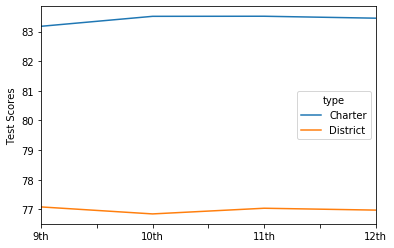

In [116]:
#Line chart of avg Reading scores per grade by school type

school_mgrades_type = school_type_mgrades.transpose()

type_line_chart = school_mgrades_type.plot.line()

plt.ylabel('Test Scores')
plt.savefig('assets/Math_v_Type')

plt.show

In [36]:
#Reading Scores by Grade

#Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

#Create a pandas series for each grade. Hint: use a conditional statement.
rgrades_9th = school_data_copy.loc[school_data_copy["grade"] == '9th']
school_rgrades_9th = rgrades_9th.set_index(['school_name'],['grade'])
school_rgrades_9th_grouped = school_rgrades_9th.groupby(['school_name']).mean()['reading_score']
school_rgrades_9th_grouped

rgrades_10th = school_data_copy.loc[school_data_copy["grade"] == '10th']
school_rgrades_10th = rgrades_10th.set_index(['school_name'],['grade'])
school_rgrades_10th_grouped = school_rgrades_10th.groupby(['school_name']).mean()['reading_score']
school_rgrades_10th_grouped

rgrades_11th = school_data_copy.loc[school_data_copy["grade"] == '11th']
school_rgrades_11th = rgrades_11th.set_index(['school_name'],['grade'])
school_rgrades_11th_grouped = school_rgrades_11th.groupby(['school_name']).mean()['reading_score']
school_rgrades_11th_grouped

rgrades_12th = school_data_copy.loc[school_data_copy["grade"] == '12th']
school_rgrades_12th = rgrades_12th.set_index(['school_name'],['grade'])
school_rgrades_12th_grouped = school_rgrades_12th.groupby(['school_name']).mean()['reading_score']
school_rgrades_12th_grouped

#Combine the series into a dataframe
school_rgrades = pd.concat([school_rgrades_9th_grouped, school_rgrades_10th_grouped,school_rgrades_11th_grouped,
                           school_rgrades_12th_grouped], axis=1)
school_rgrade_columns = ['9th','10th','11th','12th'] 
school_rgrades.columns = school_rgrade_columns
school_rgrades


,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [57]:
#Reading Scores by Grade

#Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

#Create a pandas series for each grade. Hint: use a conditional statement.
rgrades_9th = school_data_copy.loc[school_data_copy["grade"] == '9th']
school_rgrades_9th = rgrades_9th.set_index(['type'],['grade'])
school_rgrades_9th_grouped = school_rgrades_9th.groupby(['type']).mean()['reading_score']
school_rgrades_9th_grouped

rgrades_10th = school_data_copy.loc[school_data_copy["grade"] == '10th']
school_rgrades_10th = rgrades_10th.set_index(['type'],['grade'])
school_rgrades_10th_grouped = school_rgrades_10th.groupby(['type']).mean()['reading_score']
school_rgrades_10th_grouped

rgrades_11th = school_data_copy.loc[school_data_copy["grade"] == '11th']
school_rgrades_11th = rgrades_11th.set_index(['type'],['grade'])
school_rgrades_11th_grouped = school_rgrades_11th.groupby(['type']).mean()['reading_score']
school_rgrades_11th_grouped

rgrades_12th = school_data_copy.loc[school_data_copy["grade"] == '12th']
school_rgrades_12th = rgrades_12th.set_index(['type'],['grade'])
school_rgrades_12th_grouped = school_rgrades_12th.groupby(['type']).mean()['reading_score']
school_rgrades_12th_grouped

#Combine the series into a dataframe
school_type_rgrades = pd.concat([school_rgrades_9th_grouped, school_rgrades_10th_grouped,school_rgrades_11th_grouped,
                           school_rgrades_12th_grouped], axis=1)
school_type_rgrade_columns = ['9th','10th','11th','12th'] 
school_type_rgrades.columns = school_rgrade_columns
school_type_rgrades.head()

,9th,10th,11th,12th
type,,,,
Charter,83.796600,83.876134,83.992817,83.975233
District,81.091218,80.956391,80.912545,80.843267


<function matplotlib.pyplot.show>

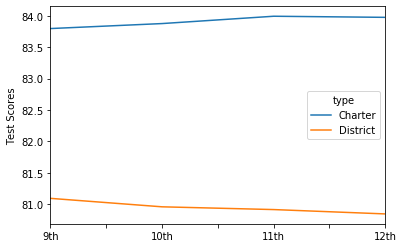

In [117]:
#Line chart of avg Reading scores per grade by school type

school_rgrades_type = school_type_rgrades.transpose()

type_line_chart = school_rgrades_type.plot.line()

plt.ylabel('Test Scores')
plt.savefig('assets/Reading_v_Type')

plt.show

In [33]:
#Scores by School Spending

#Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
    #Average Math Score
    #Average Reading Score
    #% Passing Math
    #% Passing Reading
    #Overall Passing Rate (Average of the above two)
    
bins = [0, 584, 614, 644, 675]    
group_names = ['<$585', '$585-615', '$615-645', '$645-675']

school_summary_results_df = school_summary_results.reset_index(None)
school_summary_results_df = school_summary_results_df.rename(columns = {'index':'school_name'})

scores_by_spending = pd.DataFrame(pd.cut(school_summary['Per Student Budget'].astype(float), bins, labels = group_names))
scores_by_spending_df = pd.merge(school_summary_results_df, scores_by_spending, how='left', on=['school_name'])

scores_by_spending_df = scores_by_spending_df.rename(columns = {'Per Student Budget_y':'Spending Ranges (Per Student)'})
scores_by_spending_df = pd.DataFrame(scores_by_spending_df.groupby('Spending Ranges (Per Student)').mean())
scores_by_spending_df = scores_by_spending_df[[ 'Average Math Schore', 'Average Reading Score',
                                                '% Passing Math', '% Passing Reading', '% Overall Passing Rate']]

scores_by_spending_df



,Average Math Schore,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


In [35]:
#Scores by School Size

size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

scores_by_size = pd.DataFrame(pd.cut(school_summary['size'].astype(float), size_bins, labels = group_names))
scores_by_size_df = pd.merge(school_summary_results_df, scores_by_size, how = 'left', on = ['school_name'])

scores_by_size_df = scores_by_size_df.rename(columns = {'size':'School Size'})
scores_by_size_df = pd.DataFrame(scores_by_size_df.groupby('School Size').mean())
scores_by_size_df = scores_by_size_df[[ 'Average Math Schore', 'Average Reading Score',
                                                '% Passing Math', '% Passing Reading', '% Overall Passing Rate']]
scores_by_size_df

,Average Math Schore,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


In [34]:
#Scores by School Type
scores_by_type_df = school_summary_results.groupby('School Type').mean()
scores_by_type_df = scores_by_type_df.drop(columns = ['Total Students'])
scores_by_type_df = scores_by_type_df.rename(index = {'type': 'School Type'})
scores_by_type_df.head()

,Total School Budget,Per Student Budget,Average Math Schore,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,,,
Charter,9.126881e+05,599.500000,83.473852,83.896421,93.620830,96.586489,95.103660
District,2.478275e+06,643.571429,76.956733,80.966636,66.548453,80.799062,73.673757


My two observations:
    
It is obvious from the dataframe on scores and passing rates by school type that students in charter schools are around 30% more likely to pass math, and around 10% reading, due to their higher math and reading scores than students in district schools.  

I aslo see that although District schools have bigger budgets, their overall passing rates are lower than Charter schools.  Even though the District schools' budgets are larger, they spend around the same amount of dollars per student as the charter schools who out perform them. 

In conclusion, students in charter schools have higher scores than the students in the larger district schools, and the larger the school, the overall passing rate is lower. 